<h2 style="color:#07B38C"align="center"> José Luis Palomino </h2>
<h2 style="color:#07B38C" align="center"> Tarea 2</h2>


<h2 style="color:crimson">Ejercicios</h2>

En los ejercicios 1 a 5 analizaremos la volatilidad CEMEX (`"CEMEXCPO MF Equity"`).

1. Declara la variable `cemex_close` siendo esta la columna `PX_LAST` dentro del DataFrame `bmv`; transforma el índice de `cemex_close` a fin de que sea un `DateTimeIndex`; posteriormente, declara la variable `cemex_diff` que contenga la diferencia de precios entre un día y el siguiente (**hint**: ocupa el método `shift`)

Crea una figure usando matplotlib con 2 columnas: la primera columna deberá ser el histórico de `cemex_diff`; la segunda columna, un histograma de `cemex_diff` con `bins=20`.


----





In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


KeyError: 'Diferencia'

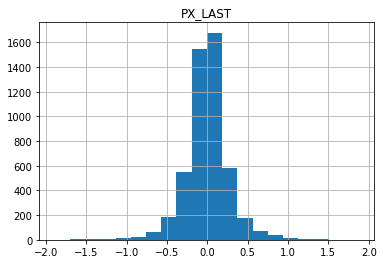

In [150]:
bmv = pd.read_csv("C:/Users/jlpalo/Desktop/DATA/lec02/ipc0019.csv")
bmv = bmv.pivot_table(values="value",
                      index="date",
                      columns=["ticker", "field"])
bmv.head()

cemex_ticker = "CEMEXCPO MF Equity"
cemex = bmv[cemex_ticker]

cemex.head()
##Declara la variable cemex_close siendo esta la columna PX_LAST dentro del DataFrame bmv
cemex_close = pd.to_numeric(cemex.PX_LAST)

##transforma el índice de cemex_close a fin de que sea un DateTimeIndex
date_index = pd.DatetimeIndex(cemex.index)
cemex.index= date_index
c1= cemex_close.shift(periods=-1)
    
cemex_diff =cemex_close- c1

# inserting new column with values of list made above  
cemex.insert(2, "Diferencia", cemex_diff) 
 
df = pd.DataFrame(cemex_diff)

hist = df.hist(bins=20)
cemex.head() 

cemex.plot(cemex_diff.index,cemex_diff["Diferencia"])
#no me 



2. Realiza un _downsampling_ de `cemex_diff`: calcula la desviación estándar por trimestre del inicio de la historia hasta el 1 de junio de 2018. Guarda la información dentro la variable `cemex_std` y grafica un histograma con `bins=20`

---


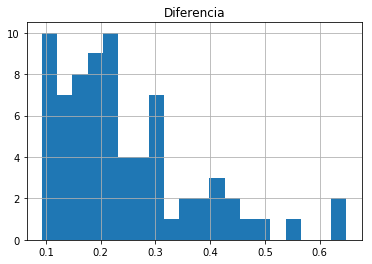

In [151]:

sample = cemex.loc[ : "2018-06-01", "Diferencia"]
# Agrupando valores por (final de) mes
cemex_std = pd.DataFrame(sample.resample("Q").std())

hist = cemex_std.hist(bins=20)


3. Realiza nuevamente el ejercicio 3 calculando en este caso la desviación estándar por semana. ¿Qué diferencias observas entre las dos distribuciones de volatilidad?

---


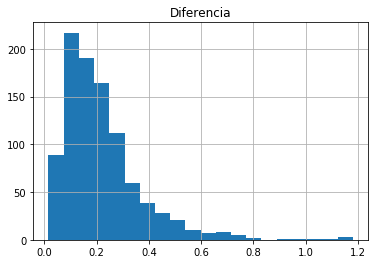

In [152]:
cemex_std = pd.DataFrame(sample.resample("W").std())

hist = cemex_std.hist(bins=20)


4. En este ejercicio analizaremos la volatilidad por mes considerando `cemex_diff`. Corre el siguiente código y explica que hace:

```python
months = cemex_diff.index.strftime("%B")
cemex_diff.groupby(months).mean().plot(kind="bar")
```

¿Cómo podrías explicar la gráfica resultante?

---


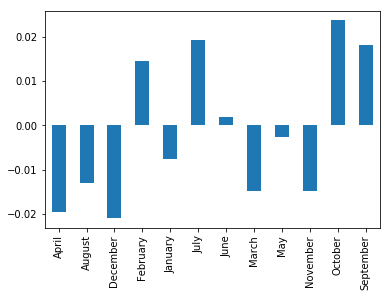

In [155]:

months = sample.index.strftime("%B")
sample.groupby(months).mean().plot(kind="bar")




5. Realiza nuevamente el ejercicio 4 considerando `cemexs_last`. ¿Por qué difieren las gráficas?


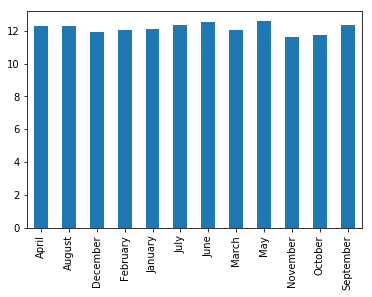

In [134]:
sample = cemex.loc[ : "2018-06-01", "PX_LAST"]

months = sample.index.strftime("%B")
sample.groupby(months).mean().plot(kind="bar")
